In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('wine.csv')

# Check for missing values
print(df.isnull().sum())

user_name             24131
country                  39
review_title              0
review_description        0
designation           29636
points                    0
price                  6963
province                 39
region_1              16068
region_2              58459
winery                    0
variety                   0
dtype: int64


              points         price
count  103322.000000  96359.000000
mean       88.540630     36.781224
std         3.090903     42.867069
min        80.000000      4.000000
25%        86.000000     18.000000
50%        88.000000     27.000000
75%        91.000000     45.000000
max       100.000000   3300.000000


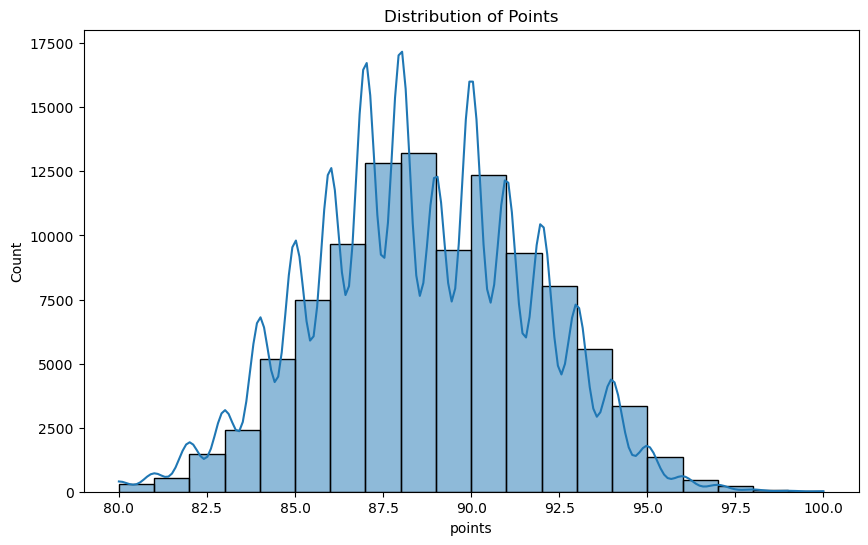

US             48153
France         19932
Italy          11370
Portugal        4038
Chile           3630
Spain           3438
Argentina       3204
Austria         2413
Germany         1944
New Zealand     1398
Name: country, dtype: int64
Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Histogram of points
plt.figure(figsize=(10, 6))
sns.histplot(df['points'], bins=20, kde=True)
plt.title('Distribution of Points')
plt.show()

# Top 10 countries
print(df['country'].value_counts().head(10))

# Top 10 varieties
print(df['variety'].value_counts().head(10))

In [3]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Drop rows with missing variety
df = df.dropna(subset=['variety'])

# Fill missing price values with the median price
df['price'] = df['price'].fillna(df['price'].median())

# Encode the variety column
le = LabelEncoder()
df['variety'] = le.fit_transform(df['variety'])

# Normalize the points and price columns
scaler = MinMaxScaler()
df[['points', 'price']] = scaler.fit_transform(df[['points', 'price']])

# Split the data into a training set and a test set
X = df.drop('variety', axis=1)
y = df['variety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select only the numerical columns
numerical_columns = ['points', 'price']
X_train_num = X_train[numerical_columns]
X_test_num = X_test[numerical_columns]

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_num, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_num)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy:', accuracy)

Model accuracy: 0.1454149528187757


/Users/unmilan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_num, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_num)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy:', accuracy)

Model accuracy: 0.1702879264456811


In [6]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

# Fit the OneHotEncoder and transform the training data
X_train_encoded = ohe.fit_transform(X_train[['country', 'province']])

# Transform the test data
X_test_encoded = ohe.transform(X_test[['country', 'province']])

# Convert the encoded data to DataFrames
X_train_encoded = pd.DataFrame(X_train_encoded.toarray(), columns=ohe.get_feature_names(['country', 'province']))
X_test_encoded = pd.DataFrame(X_test_encoded.toarray(), columns=ohe.get_feature_names(['country', 'province']))

# Add the numerical columns
X_train_encoded[['points', 'price']] = X_train[['points', 'price']]
X_test_encoded[['points', 'price']] = X_test[['points', 'price']]

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy:', accuracy)

/Users/unmilan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/unmilan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [7]:
# Fill missing values with the median
X_train_encoded = X_train_encoded.fillna(X_train_encoded.median())
X_test_encoded = X_test_encoded.fillna(X_train_encoded.median())

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy:', accuracy)

Model accuracy: 0.4153399467699008


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Fit the vectorizer and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train['review_description'])

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test['review_description'])

# Convert the tf-idf data to DataFrames
X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names())
X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names())

# Add the tf-idf data to the encoded data
X_train_combined = pd.concat([X_train_encoded.reset_index(drop=True), X_train_tfidf.reset_index(drop=True)], axis=1)
X_test_combined = pd.concat([X_test_encoded.reset_index(drop=True), X_test_tfidf.reset_index(drop=True)], axis=1)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_combined, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_combined)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy:', accuracy)

/Users/unmilan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/unmilan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Model accuracy: 0.7885797241713042


In [9]:
# Get feature importances
importances = model.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({'feature': X_train_combined.columns, 'importance': importances})

# Sort the DataFrame to see the most important features at the top
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Display the top 10 features
print(feature_importances.head(10))

                feature  importance
70    province_Bordeaux    0.022236
532               blend    0.013074
28     country_Portugal    0.012819
274   province_Piedmont    0.012640
1266            tannins    0.012379
593          chardonnay    0.012378
1064              pinot    0.012315
572            cabernet    0.011570
596              cherry    0.011558
80    province_Burgundy    0.011379


In [10]:
# Fit the LabelEncoder
le = LabelEncoder()
le.fit(df['country'])

# When transforming data, replace unknown labels with 'unknown'
known_labels = set(le.classes_)
df['country'] = df['country'].apply(lambda x: 'unknown' if x not in known_labels else x)

In [11]:
# Fit the LabelEncoder
le = LabelEncoder()
le.fit(df['province'])

# When transforming data, replace unknown labels with 'unknown'
known_labels = set(le.classes_)
df['province'] = df['province'].apply(lambda x: 'unknown' if x not in known_labels else x)

In [13]:
# Assume df is your original dataframe and 'country' is the column you want to encode
le = LabelEncoder()
le.fit(df['country'].append(pd.Series(['unknown'])))

/var/folders/2b/1szg9yhd4cq3z9y71m7gxb8m0000gn/T/ipykernel_22079/1002115618.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  le.fit(df['country'].append(pd.Series(['unknown'])))


LabelEncoder()

In [14]:
import pickle

# Assuming that 'model' is your trained model, 'vectorizer' is your TfidfVectorizer, 
# and 'le' is your LabelEncoder

# Save the trained model as a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the TfidfVectorizer as a pickle file
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save the LabelEncoder as a pickle file
with open('labelencoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [15]:
# Assuming X_train_encoded is your preprocessed training data
with open('columns.pkl', 'wb') as f:
    pickle.dump(X_train_encoded.columns, f)